# **Data Preprocessing**

In [81]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
#reading the dataset

df = pd.read_csv('Netflix Shows.csv', encoding='latin-1')
df.head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80


In [83]:
#droping the duplicate values from the dataset

df = df.drop_duplicates() 
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,60,2015,NaN,82
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,35,2015,NaN,82
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [84]:
#renaming the columns

df.rename(columns = {'ratingLevel':'ratingDescription','ratingDescription':'ratingLevel' }, inplace = True)  

In [85]:
df.describe()

,ratingLevel,release year,user rating score,user rating size
count,500.000000,500.000000,256.000000,500.000000
mean,68.754000,2010.976000,81.398438,80.972000
std,31.505089,7.829305,12.730904,0.998604
min,10.000000,1940.000000,55.000000,80.000000
25%,41.000000,2009.000000,71.000000,80.000000
50%,70.000000,2014.000000,83.500000,80.000000
75%,90.000000,2016.000000,93.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


In [86]:
# Checking for null values

print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (500, 7)
The number of nulls in each column are 
 title                  0
rating                 0
ratingDescription     33
ratingLevel            0
release year           0
user rating score    244
user rating size       0
dtype: int64


In [87]:
df = df.dropna()
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (246, 7)
The number of nulls in each column are 
 title                0
rating               0
ratingDescription    0
ratingLevel          0
release year         0
user rating score    0
user rating size     0
dtype: int64


In [88]:
#count for each type of rating

Rating_Count = (df["rating"].value_counts()).sort_index()
Rating_Count

G           18
NR           2
PG          48
PG-13        9
R            7
TV-14       76
TV-G        11
TV-MA       33
TV-PG       20
TV-Y         8
TV-Y7        6
TV-Y7-FV     8
Name: rating, dtype: int64

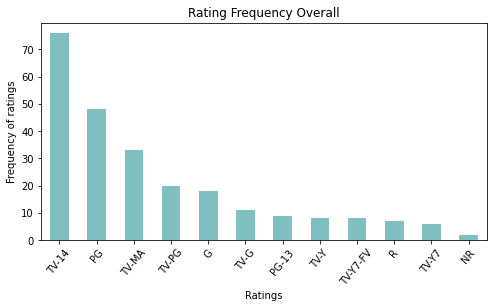

In [89]:
#frequency of the diffrent ratings

rating_freq = df['rating'].value_counts()

plt.figure(figsize=(8,4))
rating_freq.plot.bar(color='teal',alpha=0.5)
plt.xticks(rotation=50)
plt.xlabel("Ratings")
plt.ylabel("Frequency of ratings")
plt.title("Rating Frequency Overall")
plt.show()
plt.close()

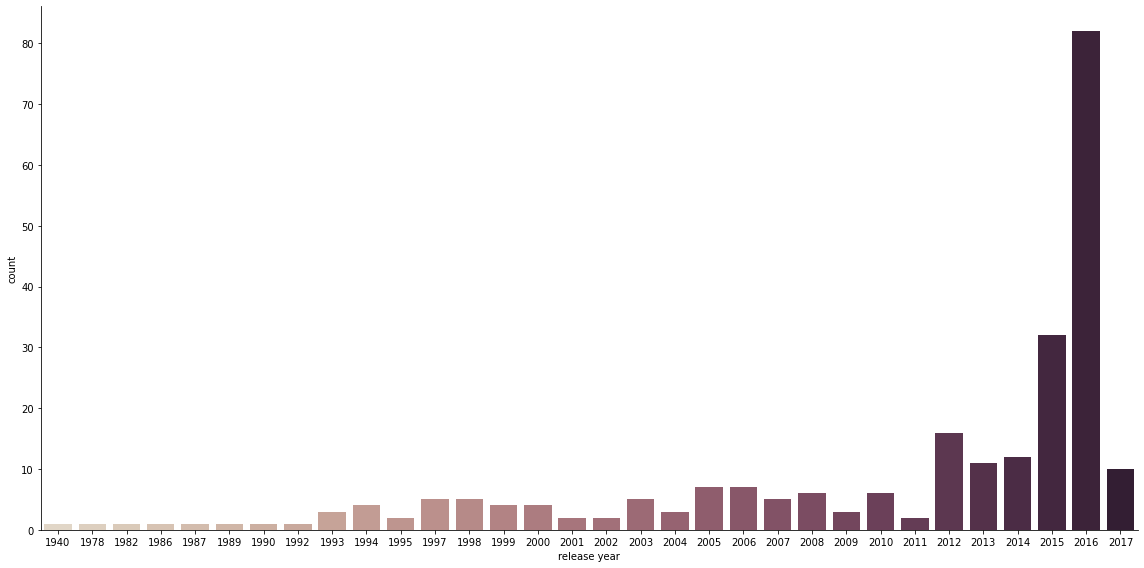

In [90]:
#Content count according to release year

# Import seaborn
import seaborn as sns

sns.catplot(data=df, x="release year", kind="count", height=8, aspect=2, palette="ch:.25")

# **Linear Regression**

In [91]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [92]:
model_df1 = df.sample(frac =.25)
model_df1

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size
79,How to Get Away with Murder,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
294,Gilmore Girls: A Year in the Life,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,77.0,80
733,Walt Disney Animation Studios Short Films Coll...,TV-G,Suitable for all ages.,35,2015,84.0,80
513,Phineas and Ferb,TV-G,Suitable for all ages.,35,2012,89.0,80
296,Gabriel lglesias: IÛªm Sorry For What I Said ...,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,84.0,80
...,...,...,...,...,...,...,...
245,The Matchbreaker,PG,Parental guidance suggested. May not be suitab...,60,2016,79.0,80
12,Death Note,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2006,77.0,80
427,The Fall,TV-MA,For mature audiences. May not be suitable for...,110,2016,61.0,80
486,Madam Secretary,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,70.0,80


In [93]:
#split dataset in features and target variable

x = model_df1[["ratingLevel", "user rating score", "user rating size"]] # Features
y = model_df1[["release year"]] # Target variable

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [95]:
mymodel = linear_model.LogisticRegression()
mymodel.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
mymodel.predict(x_test)

array([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016])

In [97]:
x_test

,ratingLevel,user rating score,user rating size
972,60,70.0,80
412,90,96.0,80
332,70,84.0,80
91,60,93.0,80
124,90,74.0,80
122,110,95.0,80
12,90,77.0,80
979,70,74.0,80
70,90,91.0,80
245,60,79.0,80


In [98]:
mymodel.score(x_test,y_test)

0.5384615384615384

In [99]:
predicted_output = mymodel.predict(x_test)
predicted_output

array([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016])

In [100]:
cm = confusion_matrix(y_test, predicted_output)
cm

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 7]])

Text(24.0, 0.5, 'Actual Value')

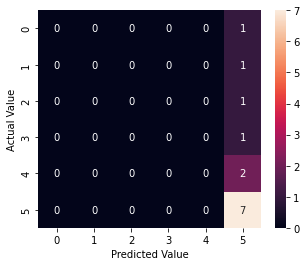

In [101]:
import seaborn as sn 
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# **SVM Model**

In [72]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
model_df2 = df.sample(50)

# Splitting the  Independent and dependent Variable  
x = model_df2[["ratingLevel", "user rating score", "user rating size"]] 
y = model_df2[["release year"]] 

In [66]:
# Splitting the dataset into training and test set.  
 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

#feature Scaling  
   
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)       

In [67]:
# Support vector classifier
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [68]:
# Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016])

In [69]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm  

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [73]:
# Prediction report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        1995       0.00      0.00      0.00         1
        1999       0.00      0.00      0.00         1
        2005       0.00      0.00      0.00         1
        2006       0.00      0.00      0.00         1
        2012       0.00      0.00      0.00         3
        2014       0.00      0.00      0.00         1
        2015       0.00      0.00      0.00         1
        2016       0.23      1.00      0.38         3
        2017       0.00      0.00      0.00         1

    accuracy                           0.23        13
   macro avg       0.03      0.11      0.04        13
weighted avg       0.05      0.23      0.09        13



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(51.0, 0.5, 'Actual Value')

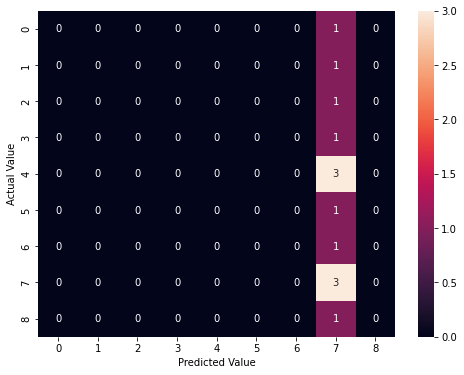

In [71]:
import seaborn as sn 
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')